# Analyzing Financial Data and Implementing Financial Models Using R
### By Clifford S. Ang
***
<h2 align = center> Chapter 2 - Individual Security Returns</center>

In [1]:
library(quantmod)
library(xts)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


## Price Returns
$$PRet_t = \frac {P_t - P_{t-1}} {P_{t-1}} = \frac {P_t} {P_{t-1}} - 1$$

In [2]:
# x
getSymbols("IBM", from = "2010-12-31", to = "2014-01-01")
IBM.prc.ret <- IBM$IBM.Close
IBM.prc.ret[c(1:3, nrow(IBM.prc.ret)), ]

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "IBM"

           IBM.Close
2010-12-31    146.76
2011-01-03    147.48
2011-01-04    147.64
2013-12-31    187.57

In [3]:
IBM.prc.ret$IBM.prc.ret <- Delt(IBM.prc.ret$IBM.Close)
IBM.prc.ret <- IBM.prc.ret[-1, 2]
options(digits = 3)
IBM.prc.ret[c(1:3, nrow(IBM.prc.ret)), ]
options(digits = 7)

           IBM.prc.ret
2011-01-03     0.00491
2011-01-04     0.00108
2011-01-05    -0.00400
2013-12-31     0.00622

## Total Returns (Holding Period Return)
$$R_t = \frac {P_t + CF_t + P_{t-1}} {P_{t-1}} = [\frac {P_t} {P_{t-1}} - 1] + \frac {CF_t} {P_{t-1}}$$
i.e. Capital Appreciation + CF Yields

In [4]:
IBM[715:720,]

           IBM.Open IBM.High IBM.Low IBM.Close IBM.Volume IBM.Adjusted
2013-11-01  216.510  217.149 215.391    179.23    3644500     148.8490
2013-11-04  216.619  217.702 215.944    180.27    3483300     149.7127
2013-11-05  216.185  216.498 213.982    177.85    6096800     147.7029
2013-11-06  213.078  215.282 212.923    179.19    4560700     149.6149
2013-11-07  215.102  217.246 215.102    180.00    5219500     150.2913
2013-11-08  214.180  215.677 212.408    179.99    6275000     150.2829

In [5]:
IBM.ret <- IBM$IBM.Adjusted
IBM.ret[c(1:3, nrow(IBM.ret)), ]

           IBM.Adjusted
2010-12-31     116.2488
2011-01-03     116.8191
2011-01-04     116.9458
2013-12-31     156.6118

In [6]:
IBM.ret$IBM.tot.ret <- Delt(IBM.ret$IBM.Adjusted)
IBM.ret[c(1:3, nrow(IBM.ret))]

           IBM.Adjusted IBM.tot.ret
2010-12-31     116.2488          NA
2011-01-03     116.8191 0.004905762
2011-01-04     116.9458 0.001084857
2013-12-31     156.6118 0.006222794

In [7]:
options(digits = 3)
IBM.ret <- IBM.ret[, 2]
IBM.ret[c(1:3, nrow(IBM.ret)), ]
options(digits = 7)

           IBM.tot.ret
2010-12-31          NA
2011-01-03     0.00491
2011-01-04     0.00108
2013-12-31     0.00622

## Logarithmic Total Returns
$$r_t = ln( \frac {P_t} {P_{t-1}} ) = ln( 1 + R_t ) = ln P_t - ln P_{t-1}$$

In [8]:
IBM.log.ret <- IBM[,6]
IBM.log.ret[c(1:3, nrow(IBM.log.ret)),]

           IBM.Adjusted
2010-12-31     116.2488
2011-01-03     116.8191
2011-01-04     116.9458
2013-12-31     156.6118

In [9]:
IBM.log.ret$IBM.log.ret <- diff(log(IBM.log.ret$IBM.Adjusted))
IBM.log.ret[c(1:3, nrow(IBM.log.ret)), ]

           IBM.Adjusted IBM.log.ret
2010-12-31     116.2488          NA
2011-01-03     116.8191 0.004893768
2011-01-04     116.9458 0.001084269
2013-12-31     156.6118 0.006203512

In [10]:
options(digits = 3)
IBM.log.ret <- IBM.log.ret[, 2]
IBM.log.ret[c(1:3, nrow(IBM.log.ret))]

           IBM.log.ret
2010-12-31          NA
2011-01-03     0.00489
2011-01-04     0.00108
2013-12-31     0.00620

In [11]:
options(scipen = 100)
tot.rets <- cbind(IBM.ret, IBM.log.ret)
tot.rets[c(1:3, nrow(tot.rets))]

           IBM.tot.ret IBM.log.ret
2010-12-31          NA          NA
2011-01-03     0.00491     0.00489
2011-01-04     0.00108     0.00108
2013-12-31     0.00622     0.00620

In [12]:
max(abs(tot.rets$IBM.tot.ret - tot.rets$IBM.log.ret), na.rm = T)
min(abs(tot.rets$IBM.tot.ret - tot.rets$IBM.log.ret), na.rm = T)
options(digits = 7, scipen = 0)

[1] 0.00363

[1] 0.00000000117

## Multi-Day Returns
### Cumulating Arithmetic Returns
$$R_{1...T} = (1 + R_1) * (1 + R_2) * ... * (1 + R_T)$$

In [13]:
IBM.acum <- IBM.ret
IBM.acum[c(1:3, nrow(IBM.acum)), ]

           IBM.tot.ret
2010-12-31          NA
2011-01-03 0.004905762
2011-01-04 0.001084857
2013-12-31 0.006222794

In [14]:
# we assume investment is made first day, so we set it to zero
IBM.acum[1,1] <- 0
IBM.acum[c(1:3, nrow(IBM.acum)), ]

           IBM.tot.ret
2010-12-31 0.000000000
2011-01-03 0.004905762
2011-01-04 0.001084857
2013-12-31 0.006222794

In [15]:
IBM.acum$GrossRet <- 1 + IBM.acum$IBM.tot.ret
IBM.acum[c(1:3, nrow(IBM.acum)), ]

           IBM.tot.ret GrossRet
2010-12-31 0.000000000 1.000000
2011-01-03 0.004905762 1.004906
2011-01-04 0.001084857 1.001085
2013-12-31 0.006222794 1.006223

In [16]:
IBM.acum$GrossSum <- cumprod(IBM.acum$GrossRet)
IBM.acum[c(1:3, nrow(IBM.acum)),]

           IBM.tot.ret GrossRet GrossSum
2010-12-31 0.000000000 1.000000 1.000000
2011-01-03 0.004905762 1.004906 1.004906
2011-01-04 0.001084857 1.001085 1.005996
2013-12-31 0.006222794 1.006223 1.347212

In [17]:
IBM.acum$NetCum <- IBM.acum$GrossSum - 1
IBM.acum[c(1:3,nrow(IBM.acum)), ]
cat("The net cumulative return is: ", 
    100*IBM.acum$NetCum[nrow(IBM.acum)], "%")

           IBM.tot.ret GrossRet GrossSum      NetCum
2010-12-31 0.000000000 1.000000 1.000000 0.000000000
2011-01-03 0.004905762 1.004906 1.004906 0.004905762
2011-01-04 0.001084857 1.001085 1.005996 0.005995941
2013-12-31 0.006222794 1.006223 1.347212 0.347212208

The net cumulative return is:  34.72122 %

### Cumulating Logarithmic Returns
$$r_{1...T} = ln((1+R_1)*(1+R_2)*...*(1+R_T))$$
$$= r_1+r_2+...+r_T$$
$$= \sum_{t=1}^T r_t$$

In [18]:
IBM.logcum <- IBM.log.ret
IBM.logcum[c(1:3, nrow(IBM.logcum)), ]

           IBM.log.ret
2010-12-31          NA
2011-01-03 0.004893768
2011-01-04 0.001084269
2013-12-31 0.006203512

In [19]:
# set first entry to 0 since assuming we purchased shares on
# close of this date
IBM.logcum[1,1] <- 0
IBM.logcum[c(1:3, nrow(IBM.logcum)), ]

           IBM.log.ret
2010-12-31 0.000000000
2011-01-03 0.004893768
2011-01-04 0.001084269
2013-12-31 0.006203512

In [20]:
# summing all log returns during this investment period
logcumret <- sum(IBM.logcum$IBM.log.ret)
logcumret

[1] 0.2980374

In [21]:
# converting log return to arithmetic since more meaningful
cumret <- exp(logcumret) - 1
cat("The net cumulative return is: ", 
    100 * cumret, "%")
# calculating multi-period returns is easier w/ log returns
# than arithmetic but you can't show daily cumulative values

The net cumulative return is:  34.72122 %

### Comparing Price Return and Total Return
Here we'll show total return yields higher returns than price returns for a dividend paying stock

In [22]:
# collecting price and total returns calculated before
IBM.Ret <- cbind(IBM.prc.ret, IBM.ret)
names(IBM.Ret) <- c("prc.ret", "tot.ret")
IBM.Ret[c(1:3, nrow(IBM.Ret)), ]

               prc.ret     tot.ret
2010-12-31          NA          NA
2011-01-03 0.004905976 0.004905762
2011-01-04 0.001084913 0.001084857
2013-12-31 0.006222858 0.006222794

In [23]:
# setting first returns to zero
IBM.Ret$prc.ret[1] <- 0
IBM.Ret$tot.ret[1] <- 0
IBM.Ret[c(1:3, nrow(IBM.Ret)), ]

               prc.ret     tot.ret
2010-12-31 0.000000000 0.000000000
2011-01-03 0.004905976 0.004905762
2011-01-04 0.001084913 0.001084857
2013-12-31 0.006222858 0.006222794

In [24]:
# getting fross returns by adding 1
IBM.Ret$gross.prc <- 1 + IBM.Ret$prc.ret
IBM.Ret$gross.tot <- 1 + IBM.Ret$tot.ret
IBM.Ret[c(1:3, nrow(IBM.Ret)), ]

               prc.ret     tot.ret gross.prc gross.tot
2010-12-31 0.000000000 0.000000000  1.000000  1.000000
2011-01-03 0.004905976 0.004905762  1.004906  1.004906
2011-01-04 0.001084913 0.001084857  1.001085  1.001085
2013-12-31 0.006222858 0.006222794  1.006223  1.006223

In [25]:
# calculate cumulative price and total return with cumulative product command
IBM.Ret$cum.prc <- cumprod(IBM.Ret$gross.prc)
IBM.Ret$cum.tot <- cumprod(IBM.Ret$gross.tot)
IBM.Ret[c(1:3, nrow(IBM.Ret)), ]

               prc.ret     tot.ret gross.prc gross.tot  cum.prc  cum.tot
2010-12-31 0.000000000 0.000000000  1.000000  1.000000 1.000000 1.000000
2011-01-03 0.004905976 0.004905762  1.004906  1.004906 1.004906 1.004906
2011-01-04 0.001084913 0.001084857  1.001085  1.001085 1.005996 1.005996
2013-12-31 0.006222858 0.006222794  1.006223  1.006223 1.278073 1.347212

[1] 1.000000 1.526868

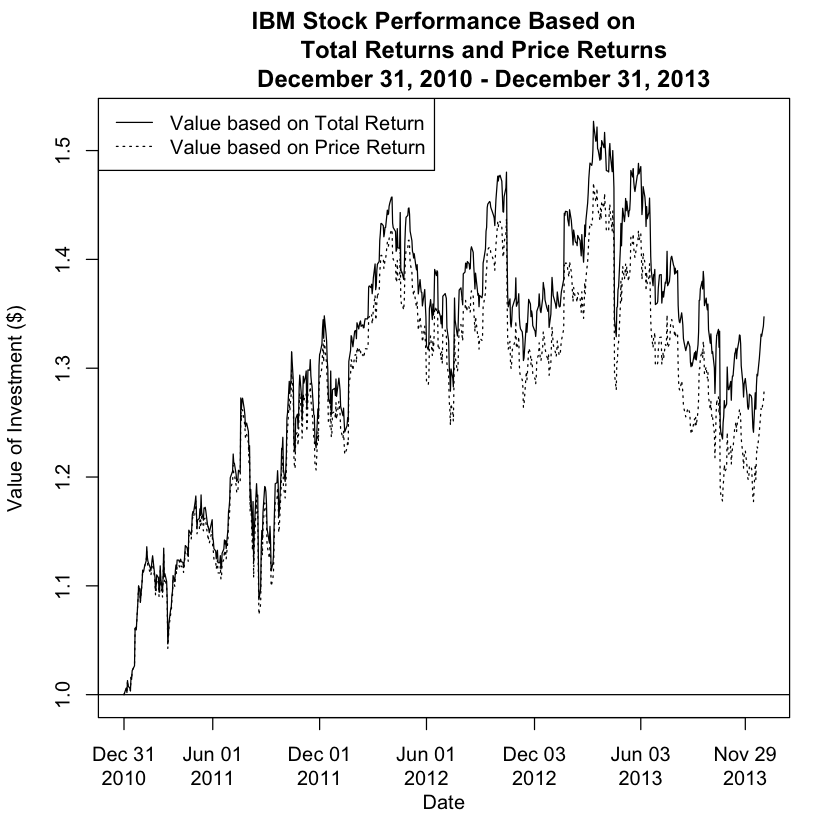

In [26]:
# plotting price and total returns with line at 1$ to easily
# see if the investment is making money or not
y.range <- range(IBM.Ret[, 5:6])
y.range
plot(IBM.Ret$cum.tot,
    type = "l",
    auto.grid = F,
    xlab = "Date",
    ylab = "Value of Investment ($)",
    ylim = y.range,
    minor.ticks = F,
    main = "IBM Stock Performance Based on
            Total Returns and Price Returns
            December 31, 2010 - December 31, 2013")
lines(IBM.Ret$cum.prc,
     type = "l",
     lty = 3)
abline(h = 1, col = "black")
legend("topleft",
      col = c("black", "black"),
      lty = c(1,3),
      c("Value based on Total Return",
       "Value based on Price Return"))

### Weekly Returns

In [27]:
data.AMZN <- getSymbols("AMZN", from = "2010-12-31", to = "2014-01-01", auto.assign = F)
data.AMZN[c(1:3, nrow(data.AMZN)), ]
class(data.AMZN)

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2010-12-31    181.96    182.30   179.51     180.00     3451900        180.00
2011-01-03    181.37    186.00   181.21     184.22     5331400        184.22
2011-01-04    186.15    187.70   183.78     185.01     5031800        185.01
2013-12-31    394.58    398.83   393.80     398.79     1996500        398.79

[1] "xts" "zoo"

In [28]:
# import data. renamed wk because to.weekly command uses the
# data object name as the prefix for the column names
wk <- data.AMZN
wk[c(1:3, nrow(data.AMZN)), ]

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2010-12-31    181.96    182.30   179.51     180.00     3451900        180.00
2011-01-03    181.37    186.00   181.21     184.22     5331400        184.22
2011-01-04    186.15    187.70   183.78     185.01     5031800        185.01
2013-12-31    394.58    398.83   393.80     398.79     1996500        398.79

In [29]:
# convert daily data to weekly data
AMZN.weekly <- to.weekly(wk)
AMZN.weekly[c(1:3, nrow(AMZN.weekly)), ]

           wk.Open wk.High wk.Low wk.Close wk.Volume wk.Adjusted
2010-12-31  181.96  182.30 179.51   180.00   3451900      180.00
2011-01-07  181.37  188.45 181.21   185.49  22183400      185.49
2011-01-14  185.04  188.94 182.51   188.75  15899000      188.75
2013-12-31  399.41  399.92 392.45   398.79   4483600      398.79

In [30]:
# remove rows other than adjusted closing price
AMZN.weekly <- AMZN.weekly[, 6]
AMZN.weekly[c(1:3, nrow(AMZN.weekly)), ]

           wk.Adjusted
2010-12-31      180.00
2011-01-07      185.49
2011-01-14      188.75
2013-12-31      398.79

In [31]:
# calculate weekly returns from friday to friday prior
# if friday is not trading day it will use last trading day of that week
AMZN.weekly$Ret <- Delt(AMZN.weekly$wk.Adjusted)
AMZN.weekly[c(1:3, nrow(AMZN.weekly)), ]

           wk.Adjusted         Ret
2010-12-31      180.00          NA
2011-01-07      185.49 0.030500028
2011-01-14      188.75 0.017575044
2013-12-31      398.79 0.001783616

In [32]:
# delete first observation and column since only returns are needed
# and the first observation is meaningless
AMZN.weekly <- AMZN.weekly[-1, 2]
AMZN.weekly[c(1:3, nrow(AMZN.weekly)), ]

                    Ret
2011-01-07  0.030500028
2011-01-14  0.017575044
2011-01-21 -0.060026501
2013-12-31  0.001783616

### Monthly Returns

In [33]:
# import data
mo <- data.AMZN
mo[c(1:3, nrow(mo)), ]

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2010-12-31    181.96    182.30   179.51     180.00     3451900        180.00
2011-01-03    181.37    186.00   181.21     184.22     5331400        184.22
2011-01-04    186.15    187.70   183.78     185.01     5031800        185.01
2013-12-31    394.58    398.83   393.80     398.79     1996500        398.79

In [34]:
# convert daily data to monthly
AMZN.monthly <- to.monthly(mo)
AMZN.monthly[c(1:3, nrow(AMZN.monthly)), ]

Warning message:
“timezone of object (UTC) is different than current timezone ().”

         mo.Open mo.High mo.Low mo.Close mo.Volume mo.Adjusted
Dec 2010  181.96  182.30 179.51   180.00   3451900      180.00
Jan 2011  181.37  191.60 166.90   169.64 113611300      169.64
Feb 2011  170.52  191.40 169.51   173.29  95776400      173.29
Dec 2013  399.00  405.63 379.50   398.79  55686700      398.79

In [35]:
# remove all columns but adjusted close
AMZN.monthly <- AMZN.monthly[, 6]
AMZN.monthly[c(1:3, nrow(AMZN.monthly)), ]

Warning message:
“timezone of object (UTC) is different than current timezone ().”

         mo.Adjusted
Dec 2010      180.00
Jan 2011      169.64
Feb 2011      173.29
Dec 2013      398.79

In [36]:
# calculate monthly returns
AMZN.monthly$Ret <- Delt(AMZN.monthly$mo.Adjusted)
AMZN.monthly[c(1:3, nrow(AMZN.monthly)), ]

         mo.Adjusted         Ret
Dec 2010      180.00          NA
Jan 2011      169.64 -0.05755556
Feb 2011      173.29  0.02151612
Dec 2013      398.79  0.01313453

In [37]:
# remove adjusted column and first row
AMZN.monthly <- AMZN.monthly[-1, 2]
AMZN.monthly[c(1:3, nrow(AMZN.monthly)), ]

                 Ret
Jan 2011 -0.05755556
Feb 2011  0.02151612
Mar 2011  0.03947148
Dec 2013  0.01313453

### Comparing Performance of Multiple Securities: Total Returns

In [38]:
# get data
#AMZN
data.AMZN[c(1:3, nrow(data.AMZN)), ]
#IBM
data.IBM <- IBM
data.IBM[c(1:3, nrow(data.IBM)), ]
#GSPC
data.GSPC <- getSymbols("^GSPC", from = "2010-12-31", to = "2014-01-01", auto.assign = F)
data.GSPC[c(1:3, nrow(data.GSPC)), ]
#YAHOO
data.YAHOO <- getSymbols("AABA", from = "2010-12-31", to = "2014-01-01", auto.assign = F)
names(data.YAHOO) <- c("YAHOO.Open", "YAHOO.High", "YAHOO.Low", "YAHOO.Close", "YAHOO.Volume", "YAHOO.Adjusted")
data.YAHOO[c(1:3, nrow(data.YAHOO)), ]

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2010-12-31    181.96    182.30   179.51     180.00     3451900        180.00
2011-01-03    181.37    186.00   181.21     184.22     5331400        184.22
2011-01-04    186.15    187.70   183.78     185.01     5031800        185.01
2013-12-31    394.58    398.83   393.80     398.79     1996500        398.79

           IBM.Open IBM.High IBM.Low IBM.Close IBM.Volume IBM.Adjusted
2010-12-31  185.241  185.671 184.269    146.76    2969800     116.2488
2011-01-03  185.847  187.097 185.759    147.48    4603800     116.8191
2011-01-04  186.289  187.123 185.128    147.64    5060100     116.9458
2013-12-31  223.354  224.911 223.127    187.57    3619700     156.6118

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2010-12-31   1256.76   1259.34  1254.19    1257.64  1799770000       1257.64
2011-01-03   1257.62   1276.17  1257.62    1271.87  4286670000       1271.87
2011-01-04   1272.95   1274.12  1262.66    1270.20  4796420000       1270.20
2013-12-31   1842.61   1849.44  1842.41    1848.36  2312840000       1848.36

           YAHOO.Open YAHOO.High YAHOO.Low YAHOO.Close YAHOO.Volume
2010-12-31      16.74      16.76     16.47       16.63      7754500
2011-01-03      16.81      16.94     16.67       16.75     17684000
2011-01-04      16.71      16.83     16.57       16.59     11092800
2013-12-31      40.17      40.50     40.00       40.44      8291400
           YAHOO.Adjusted
2010-12-31          16.63
2011-01-03          16.75
2011-01-04          16.59
2013-12-31          40.44

In [39]:
# combine adjusted close prices
multi <- data.AMZN[, 6]
multi <- merge(multi, data.IBM[, 6])
multi <- merge(multi, data.GSPC[, 6])
multi <- merge(multi, data.YAHOO[, 6])
multi[c(1:3, nrow(multi)), ]

           AMZN.Adjusted IBM.Adjusted GSPC.Adjusted YAHOO.Adjusted
2010-12-31        180.00     116.2488       1257.64          16.63
2011-01-03        184.22     116.8191       1271.87          16.75
2011-01-04        185.01     116.9458       1270.20          16.59
2013-12-31        398.79     156.6118       1848.36          40.44

In [42]:
multi.df <- cbind(data.frame(index(multi)), data.frame(multi))
names(multi.df) <- paste(c("date", "AMZN", "IBM", "GSPC", "YHOO"))
multi.df[c(1:3, nrow(multi.df)), ]

,date,AMZN,IBM,GSPC,YHOO
2010-12-31,2010-12-31,180.00,116.2488,1257.64,16.63
2011-01-03,2011-01-03,184.22,116.8191,1271.87,16.75
2011-01-04,2011-01-04,185.01,116.9458,1270.20,16.59
2013-12-31,2013-12-31,398.79,156.6118,1848.36,40.44


In [43]:
multi.df$AMZN.idx <- multi.df$AMZN / multi.df$AMZN[1]
multi.df$GSPC.idx <- multi.df$GSPC / multi.df$GSPC[1]
multi.df$YHOO.idx <- multi.df$YHOO / multi.df$YHOO[1]
multi.df$IBM.idx <- multi.df$IBM / multi.df$IBM[1]
multi.df[c(1:3,nrow(multi.df)),6:9]

,AMZN.idx,GSPC.idx,YHOO.idx,IBM.idx
2010-12-31,1.000000,1.000000,1.0000000,1.000000
2011-01-03,1.023444,1.011315,1.0072159,1.004906
2011-01-04,1.027833,1.009987,0.9975948,1.005996
2013-12-31,2.215500,1.469705,2.4317499,1.347212


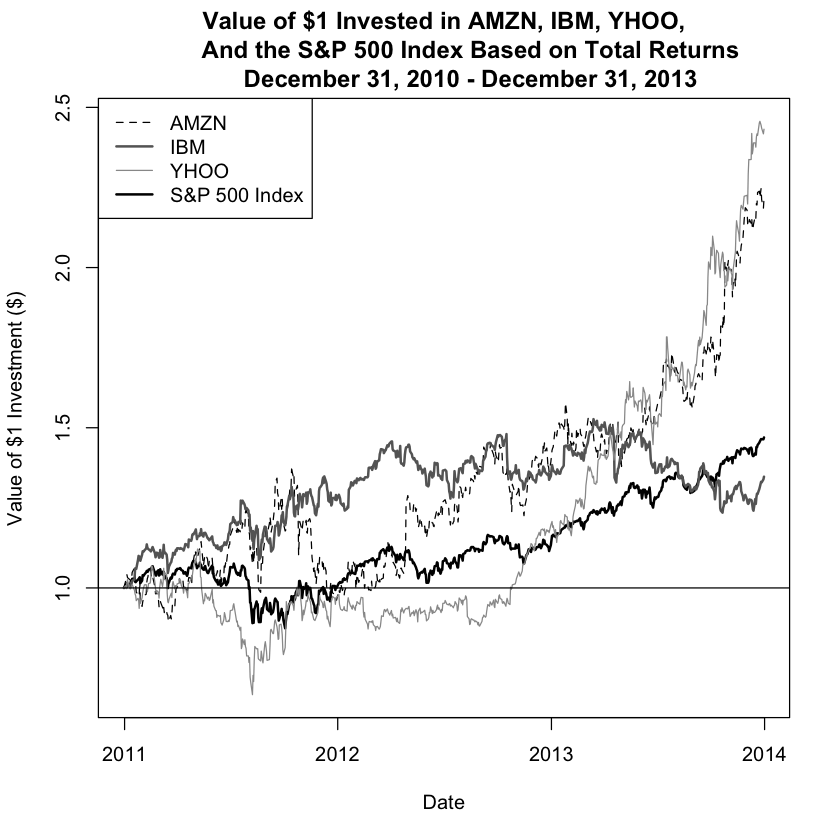

In [44]:
y.range<-range(multi.df[,6:9])
par(mfrow=c(1,1))
plot(x=multi.df$date,
    xlab="Date",
    y=multi.df$GSPC.idx,
    ylim=y.range,
    ylab="Value of $1 Investment ($)",
    type="l",
    col="black",
    lty=1,
    lwd=2,
    main="Value of $1 Invested in AMZN, IBM, YHOO,
        And the S&P 500 Index Based on Total Returns
        December 31, 2010 - December 31, 2013")

lines(x=multi.df$date,
    y=multi.df$AMZN.idx,
    col="black",
    lty=2,
    lwd=1)

lines(x=multi.df$date,
    y=multi.df$IBM.idx,
    col="gray40",
    lty=1,
    lwd=2)

lines(x=multi.df$date,
    y=multi.df$YHOO.idx,
    col="gray60",
    lty=1,
    lwd=1)

abline(h=1,lty=1,col="black")

legend("topleft",
    c("AMZN","IBM","YHOO","S&P 500 Index"),
    col=c("black","gray40","gray60","black"),
    lty=c(2,1,1,1),
    lwd=c(1,2,1,2))